In [1]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]



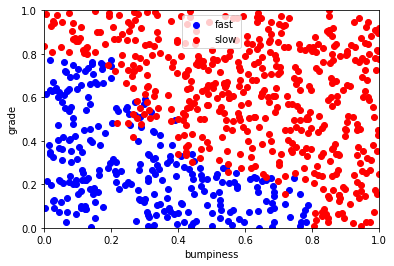

In [2]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


In [21]:
# KNeighborsClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

clf = KNeighborsClassifier(n_neighbors=4).fit(features_train,labels_train)
pred = clf.predict(features_test)

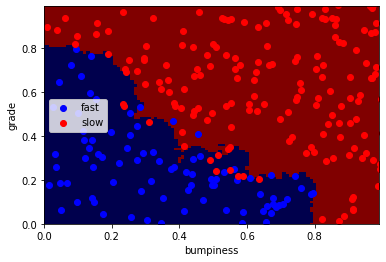

In [22]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, pred))

0.94


In [37]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_split=4).fit(features_train, labels_train)
pred = clf.predict(features_test)

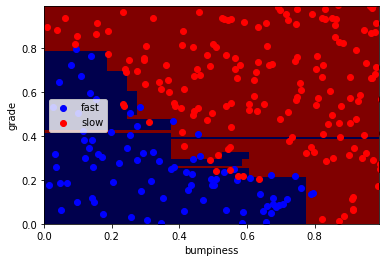

In [38]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [39]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, pred))

0.912


In [49]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(features_train, labels_train)
pred = clf.predict(features_test)

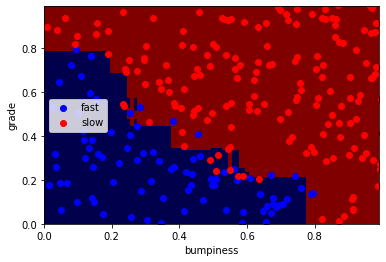

In [50]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [51]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, pred))

0.924
